In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
rng = np.random.default_rng(seed=42)

In [4]:
centers = np.array([
    [0.0, 0.0],     # class 0 center
    [3.0, 0.0],     # class 1 center
    [1.5, 2.5],     # class 2 center
])

In [ ]:
points = []
labels = []
num_points = 5

for cls, center in enumerate(centers):
	pts = rng.normal(loc=center, scale=0.5, size=(num_points, len(center)))
	lbs = np.full(num_points, cls)
	points.append(pts)
	labels.append(lbs)


In [8]:
print(points)

[array([[ 0.15235854, -0.51999205],
       [ 0.3752256 ,  0.47028236],
       [-0.97551759, -0.65108975],
       [ 0.0639202 , -0.1581213 ],
       [-0.00840058, -0.42652196]]), array([[ 3.43969899,  0.38889597],
       [ 3.03301535,  0.5636206 ],
       [ 3.23375467, -0.42964623],
       [ 3.18437539, -0.4794413 ],
       [ 3.43922515, -0.02496296]]), array([[1.40756882, 2.15953523],
       [2.11127067, 2.42273526],
       [1.28583609, 2.32393322],
       [1.76615459, 2.68272203],
       [1.70636631, 2.7154105 ]])]


In [ ]:
X = np.vstack(points)   # shape (15, 2)
y = np.concatenate(labels)  # shape (15,)

In [ ]:
print("X =", X)
print("y =", y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X = [[ 0.15235854 -0.51999205]
 [ 0.3752256   0.47028236]
 [-0.97551759 -0.65108975]
 [ 0.0639202  -0.1581213 ]
 [-0.00840058 -0.42652196]
 [ 3.43969899  0.38889597]
 [ 3.03301535  0.5636206 ]
 [ 3.23375467 -0.42964623]
 [ 3.18437539 -0.4794413 ]
 [ 3.43922515 -0.02496296]
 [ 1.40756882  2.15953523]
 [ 2.11127067  2.42273526]
 [ 1.28583609  2.32393322]
 [ 1.76615459  2.68272203]
 [ 1.70636631  2.7154105 ]]
y = [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
X shape: (15, 2)
y shape: (15,)


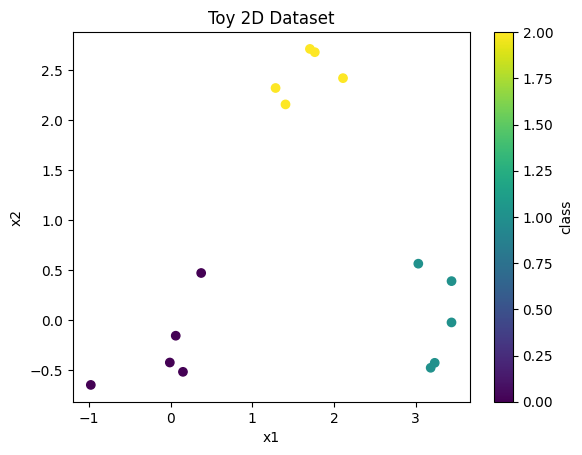

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Toy 2D Dataset")
plt.colorbar(label="class")
plt.show()